<a href="https://colab.research.google.com/github/aniketkumar2808/GenAI/blob/main/Meme_Generator_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task: Build a Meme Generator App that allows users to input a meme caption and generate a meme image using an image generation model Fal.ai. Then, use a text generation model(e.g., GPT or Llama, Gemini) to suggest funny or creative captions for the meme.

In [2]:
!pip install openai==1.57.3 fal-client==0.5.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.2/390.2 kB 30.4 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.86.0
    Uninstalling openai-1.86.0:
      Successfully uninstalled openai-1.86.0


In [8]:
# Helper function to display images: display_image_from_url
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

def display_image_from_url(url: str, max_width: int = 600, max_height: int = 400):
    """
    Display an image from a URL with a maximum size constraint.

    Args:
    url (str): The URL of the image to display.
    max_width (int): The maximum width of the displayed image. Default is 800.
    max_height (int): The maximum height of the displayed image. Default is 600.
    """
    from PIL import Image
    import requests
    from io import BytesIO
    from IPython.display import display

    # Fetch the image
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    # Calculate the aspect ratio
    aspect_ratio = img.width / img.height

    # Determine new size while maintaining aspect ratio
    if img.width > max_width or img.height > max_height:
        if aspect_ratio > 1:
            new_width = min(img.width, max_width)
            new_height = int(new_width / aspect_ratio)
        else:
            new_height = min(img.height, max_height)
            new_width = int(new_height * aspect_ratio)

        img = img.resize((new_width, new_height))

    # Display the resized image
    display(img)


In [9]:
import os
import fal_client
from typing import Tuple
from openai import OpenAI
from typing import Tuple

os.environ["FAL_KEY"] = "97832094-d623-43d5-8105-f22ff3f2cd2f:45b3b21b5dc1f44c6fddc89f4e5160b8"
# Initialize OpenAI client with Together.ai base URL
client = OpenAI(
    api_key="ecbef587bd21b5ec1eb1bf91fb3054686fe5c490dfcd7325a37adb4befee8472",
    base_url="https://api.together.xyz/v1"
)

In [10]:
#Create generate_meme_image Function
def generate_meme_image(prompt: str) -> str:
  """
  Generate an image using FLUX.1-schnell model.

  Args:
  prompt(str): The prompt to use for generating the image.

  Returns:
  str: The URL of the generated image.
  """
  result = fal_client.subscribe(
    "fal-ai/flux/schnell",
    arguments={
        "prompt": prompt,
    },
    with_logs=True,
  )
  return result['images'][0]['url']

#Create generate_meme_captions Function
def generate_meme_captions(image_url: str, prompt: str) -> str:
  """
    Generate a funny and creative captions for a meme using Llama-Vision-Free model.

    Args:
    image_url(str): The URL of the image to use for generating the captions.
    prompt(str): The prompt to use for generating the captions.

    Returns:
    str: The generated captions.
  """
  prompt = f"Look at this image:{image_url}. Generate funny or creative captions for the meme: {prompt}"
  response = client.chat.completions.create(
      model="meta-llama/Llama-Vision-Free",
      messages=[{"role": "user", "content": prompt}]
      )
  return response.choices[0].message.content

#Create meme_generator_app Function
def meme_generator_app(prompt: str) -> Tuple[str,str]:
  """
  Generate a meme image and captions using the provided prompt.

  Args:
  prompt(str): The prompt to use for generating the meme.

  Returns:
  Tuple[str,str]: The generated meme image and captions.
  """
  image_url = generate_meme_image(prompt)
  captions = generate_meme_captions(image_url, prompt)
  return image_url, captions

Generated Image:


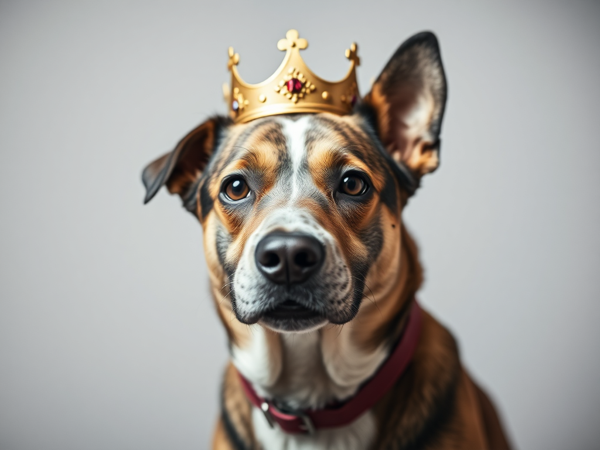

Generated Captions:
Here are some funny and creative captions for the meme:

1. "When you finally get the treat you've been barking for"
2. "Newly crowned King of the Couch"
3. "I just wanted to wear a funny hat, but now I'm a monarch"
4. "My humans think I'm a good boy, but the truth is, I'm a dog-king"
5. "I'm not lazy, I'm just conserving energy for my royal duties"
6. "Warning: dog may drool on your throne"
7. "Who needs a cape when you can just wear a crown?"
8. "My kingdom is a small living room, but it's mine"
9. "I'm not a dog, I'm a canine overlord"
10. "When you finally get the recognition you deserve...from your owner"
11. "My crown says it all: I'm the top dog around here"
12. "I'm not barking up the wrong tree, I'm just ruling with an iron paw"
13. "Dog-archy: when you're the only one in charge"
14. "My royal highness, I mean, my royal hotness"
15. "Who needs a throne when you can just curl up on the couch?"

Feel free to pick the one that makes you laugh the most or inspi

In [11]:
# Example usage
topic = "A dog wearing a crown"
meme_image, meme_captions = meme_generator_app(topic)

print("Generated Image:")
display_image_from_url(meme_image)

print("Generated Captions:")
print(meme_captions)